In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

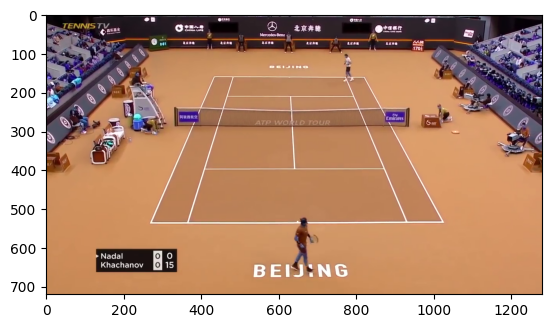

In [2]:
image = cv2.imread('input_image9.png', cv2.IMREAD_COLOR)

plt.imshow(image)
plt.show()

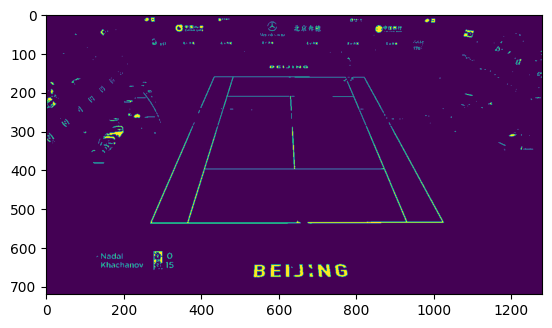

In [61]:
# Converti l'immagine in scala di grigi
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Applica l'equalizzazione dell'istogramma
equalized_image = cv2.equalizeHist(gray)

_, binary_image = cv2.threshold(gray, 220, 255, cv2.THRESH_BINARY)

plt.imshow(binary_image)
plt.show()

In [62]:
# Utilizza SIFT per rilevare i punti chiave
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(gray, None)

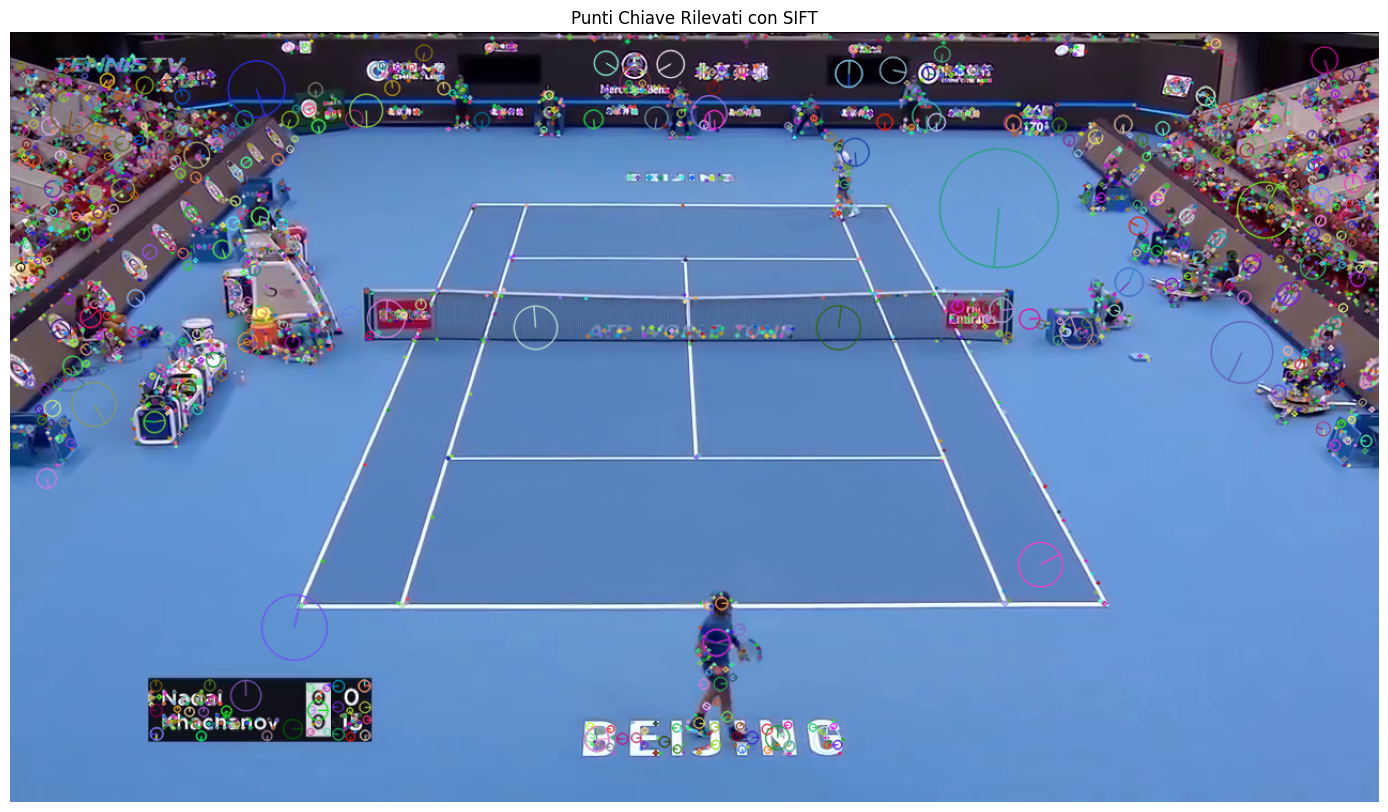

In [63]:
# Disegna i punti chiave sull'immagine originale
sift_image = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Aumenta la dimensione della figura
plt.figure(figsize=(20, 10))

# Visualizza i punti chiave rilevati con SIFT
plt.title('Punti Chiave Rilevati con SIFT')
plt.imshow(cv2.cvtColor(sift_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

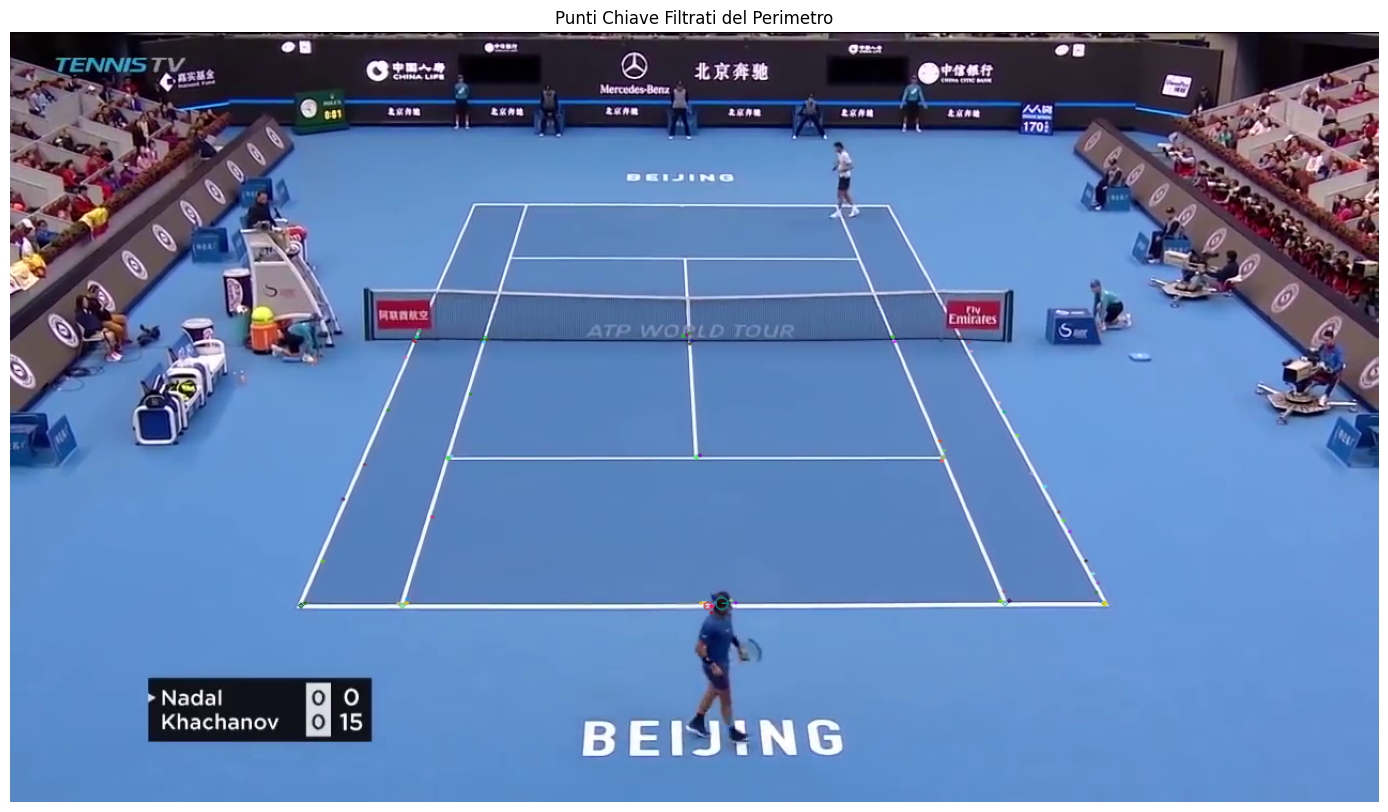

In [64]:
# Trova i contorni
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Seleziona il contorno più grande (assumendo che sia il campo da tennis)
if contours:
    largest_contour = max(contours, key=cv2.contourArea)
    contour_image = image.copy()
    cv2.drawContours(contour_image, [largest_contour], -1, (0, 255, 0), 2)
else:
    largest_contour = None

# Filtra i punti chiave per ottenere solo quelli del perimetro del campo
keypoints_filtered = []
for kp in keypoints:
    x, y = kp.pt
    distance = cv2.pointPolygonTest(largest_contour, (int(x), int(y)), True)
    if distance > -10:  # Considera solo i punti chiave vicini al contorno
        keypoints_filtered.append(kp)

# Disegna i punti chiave filtrati sull'immagine originale
sift_filtered_image = cv2.drawKeypoints(image, keypoints_filtered, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Aumenta la dimensione della figura
plt.figure(figsize=(20, 10))

# Visualizza i punti chiave filtrati
plt.title('Punti Chiave Filtrati del Perimetro')
plt.imshow(cv2.cvtColor(sift_filtered_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Mostra la figura
plt.show()